<a href="https://colab.research.google.com/github/farhananwari07/TugbesML_145-157/blob/main/VGGCOVIDML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
import os
import argparse
import numpy as np
from imutils import paths
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import preprocess_input

In [ ]:
imagePathsTest = list(paths.list_images("/content/drive/MyDrive/dataset/covid19/Covid19-dataset/test"))
testX = []
testY = []

for imagePath in imagePathsTest:

	label = imagePath.split(os.path.sep)[-2]
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)
	testX.append(image)
	testY.append(label)

testX = np.array(testX, dtype="float32")
testY = np.array(testY)

lb = LabelEncoder()
testY = lb.fit_transform(testY)
testY = to_categorical(testY)

In [ ]:


IMAGE_SIZE = [224, 224] 

train_path = '/content/drive/MyDrive/dataset/covid19/Covid19-dataset/train'
valid_path = '/content/drive/MyDrive/dataset/covid19/Covid19-dataset/test'



In [ ]:


vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



58900480/58889256 [==============================] - 1s 0us/step


In [ ]:


for layer in vgg.layers:
  layer.trainable=False



In [ ]:
folders=glob( '../input/covid19-image-dataset/Covid19-dataset/train/*')

In [ ]:
x=Flatten()(vgg.output)

prediction=Dense(3,activation='softmax')(x)


model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
del model

In [ ]:


model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:


model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)



In [ ]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)



In [ ]:


# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 shuffle= False,
                                                 class_mode = 'categorical')



Found 251 images belonging to 3 classes.


In [ ]:
del training_set

In [ ]:


test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            shuffle=False,
                                            class_mode = 'categorical')



Found 66 images belonging to 3 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/15
8/8 [==============================] - 88s 9s/step - loss: 3.5532 - accuracy: 0.1833 - val_loss: 2.3981 - val_accuracy: 0.3030
Epoch 2/15
8/8 [==============================] - 17s 2s/step - loss: 1.5173 - accuracy: 0.3705 - val_loss: 0.9962 - val_accuracy: 0.4091
Epoch 3/15
8/8 [==============================] - 17s 2s/step - loss: 0.8093 - accuracy: 0.7331 - val_loss: 0.3629 - val_accuracy: 0.8636
Epoch 4/15
8/8 [==============================] - 18s 2s/step - loss: 0.6326 - accuracy: 0.7809 - val_loss: 0.5886 - val_accuracy: 0.7121
Epoch 5/15
8/8 [==============================] - 17s 2s/step - loss: 0.3972 - accuracy: 0.8725 - val_loss: 0.3915 - val_accuracy: 0.8182
Epoch 6/15
8/8 [==============================] - 18s 2s/step - loss: 0.2403 - accuracy: 0.9163 - val_loss: 0.7059 - val_accuracy: 0.7424
Epoch 7/15
8/8 [==============================] - 17s 2s/step - loss: 0.3359 - accuracy: 0.8606 - val_loss: 0.2898 - val_accuracy: 0.8485
Epoch 8/15
8/8 [==================

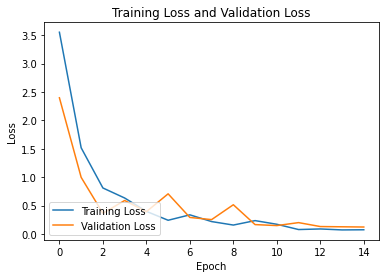

In [ ]:
N = 15

plt.figure()
plt.plot(np.arange(0, N), r.history["loss"], label="Training Loss")
plt.plot(np.arange(0, N), r.history["val_loss"], label="Validation Loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="lower left")

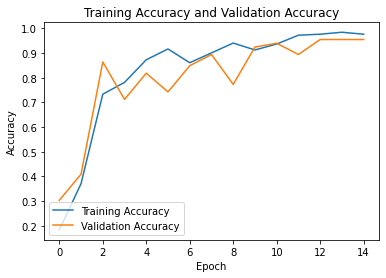

In [ ]:
plt.figure()
plt.plot(np.arange(0, N), r.history["accuracy"], label="Training Accuracy")
plt.plot(np.arange(0, N), r.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training Accuracy and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

In [ ]:
%cd /content/drive/MyDrive/dataset/covid19/saved model

/content/drive/MyDrive/dataset/covid19/saved model


In [ ]:
!ls

 AccuracyPlotWMF.png   model2.h5     model4CNNbiasa.h5	 model7VGG16.h5
'Copy of Model.h5'     model2.json   model5Resnet50.h5
 LossPlotWMF.png       model3.h5     model6Resnet50.h5


In [ ]:
model.save("model7VGG16.h5")

In [ ]:
from keras.models import load_model
model = load_model('model7VGG16.h5')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
labels = ['Normal','Covid19','Pnuemonia']

In [ ]:
import seaborn as sns
def evaluate1(val_gen,model):
  batch_size = 12
  num_of_test_samples = len(val_gen.filenames)

  Y_pred = model.predict(val_gen, num_of_test_samples // batch_size+1)
  y_pred = np.argmax(Y_pred, axis=1)

  cm = confusion_matrix(val_gen.classes, y_pred)
  plt.figure(figsize=(8, 8))
  sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
  plt.xticks(ticks=[0.5, 1.5, 2.5], labels=labels)
  plt.yticks(ticks=[0.5, 1.5, 2.5], labels=labels)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()
  print('\n\nClassification Report\n')
  target_names = ['Normal','Covid19','Pnuemonia']
  print(classification_report(val_gen.classes, y_pred, target_names=target_names))

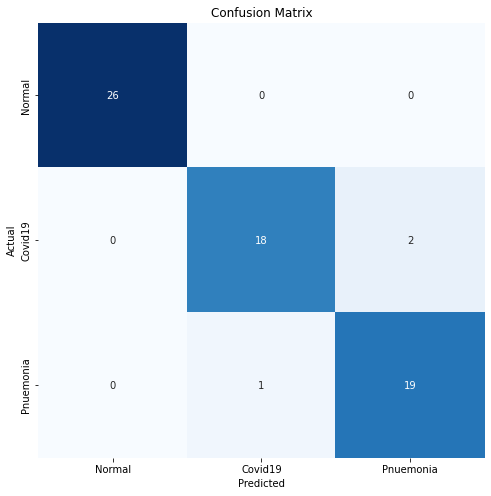



Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        26
     Covid19       0.95      0.90      0.92        20
   Pnuemonia       0.90      0.95      0.93        20

    accuracy                           0.95        66
   macro avg       0.95      0.95      0.95        66
weighted avg       0.96      0.95      0.95        66



In [ ]:
evaluate1(test_set, model)

In [ ]:
evaluate1(test_set, model)

In [ ]:
%cd /content/drive/MyDrive/dataset/model_covid/teguh

/content/drive/.shortcut-targets-by-id/1bGb4HZR8dQV_0OPxVI657P3WEdvBdwG0/model_covid/teguh


In [ ]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os

In [ ]:
# load json and create model
json_file = open('Model.json', 'r')
loaded_resnet_json = json_file.read()
json_file.close()
modelresnet = model_from_json(loaded_resnet_json)
# load weights into new model
modelresnet.load_weights("Model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
INIT_LR = 1e-4
EPOCHS = 10
BS = 32

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=INIT_LR, decay=INIT_LR/EPOCHS)
modelresnet.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
del loaded_model

In [ ]:
predIdxs = modelresnet.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)

Accuracy = (accuracy_score(testY.argmax(axis=1),predIdxs)*100)
print('TEST ACCURACY in Percentage:', round(Accuracy,2),'%')
print("")
print("-------------------------------------------------------------------")
print("")
print("CLASSIFICATION REPORT:")
print("")
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

TEST ACCURACY in Percentage: 96.97 %

-------------------------------------------------------------------

CLASSIFICATION REPORT:

                 precision    recall  f1-score   support

          Covid       1.00      0.96      0.98        26
         Normal       1.00      0.95      0.97        20
Viral Pneumonia       0.91      1.00      0.95        20

       accuracy                           0.97        66
      macro avg       0.97      0.97      0.97        66
   weighted avg       0.97      0.97      0.97        66



[1]
normal


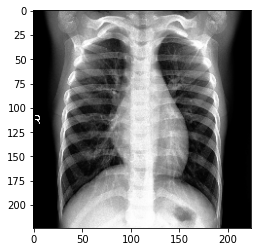

In [ ]:
from PIL import Image
from keras.preprocessing import image
label =  {0:"covid",1:"normal",2:'pneumonia'}

img_ = image.load_img("/content/drive/MyDrive/dataset/covid19/Covid19-dataset/test/Normal/0119.jpeg", target_size=(224, 224))
imag = image.img_to_array(img_)
imag = np.expand_dims(imag, axis=0)
pred = modelresnet.predict(imag)
pred = np.argmax(pred,axis=1)
print(pred)
print(label[pred[0]])
plt.imshow(img_)